<a href="https://colab.research.google.com/github/hilmi86857/decision-tree/blob/main/hilmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Unduh dan muat dataset credit card fraud detection
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv

import pandas as pd

# Baca file CSV
df = pd.read_csv("creditcard.csv")

# Tampilkan 5 data teratas
print("🔹 Contoh Data:")
print(df.head())

# Jumlah data per kelas
print("\n🔹 Distribusi Kelas (0 = Normal, 1 = Fraud):")
print(df['Class'].value_counts())


🔹 Contoh Data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data menjadi 70% train dan 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("✅ Data berhasil di-split.")
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


✅ Data berhasil di-split.
Jumlah data latih: 199364
Jumlah data uji: 85443


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

print("✅ Model Naive Bayes telah dilatih.")


✅ Model Naive Bayes telah dilatih.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Lakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("🔹 Akurasi:", accuracy_score(y_test, y_pred))


🔹 Confusion Matrix:
[[84743   552]
 [   56    92]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0     0.9993    0.9935    0.9964     85295
           1     0.1429    0.6216    0.2323       148

    accuracy                         0.9929     85443
   macro avg     0.5711    0.8076    0.6144     85443
weighted avg     0.9979    0.9929    0.9951     85443

🔹 Akurasi: 0.9928841449855459


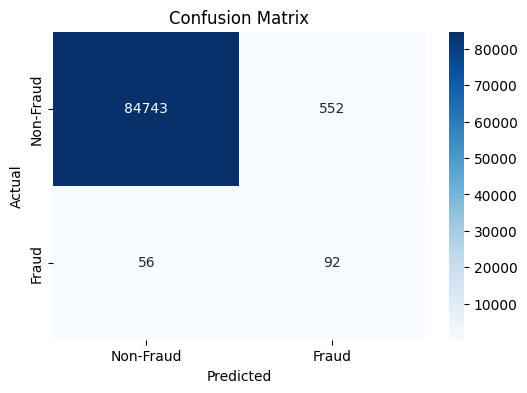

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix (Heatmap)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


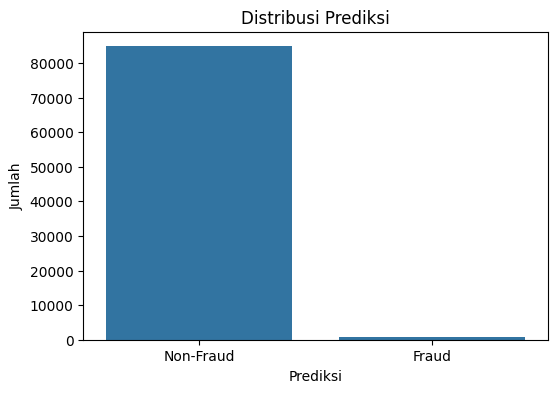

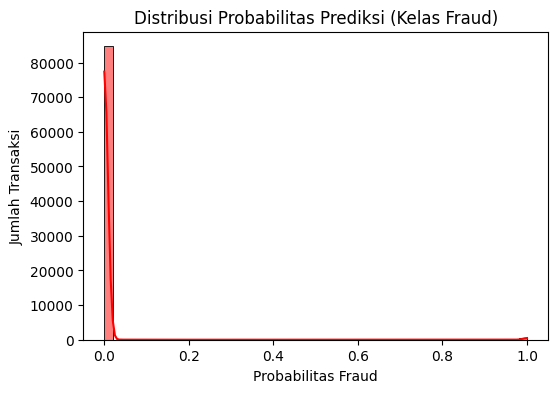

In [ ]:
# Plot jumlah prediksi per kelas
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred)
plt.title("Distribusi Prediksi")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.xlabel("Prediksi")
plt.ylabel("Jumlah")
plt.show()

# Probabilitas prediksi kelas 'Fraud'
y_proba = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(6, 4))
sns.histplot(y_proba, bins=50, color='red', kde=True)
plt.title("Distribusi Probabilitas Prediksi (Kelas Fraud)")
plt.xlabel("Probabilitas Fraud")
plt.ylabel("Jumlah Transaksi")
plt.show()
